In [2]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import wilson_action
from modules import utility
from modules import global_variables
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib widget

In [3]:
folders = utility.list_all_folders(global_variables.data_path_surface_abs,"su4")

../data/output-measure-surface-abs/su4-40-40-60-6/beta-10.84-twist-2 , index: 0
../data/output-measure-surface-abs/su4-44-44-64-6/beta-10.85-twist-1 , index: 1
../data/output-measure-surface-abs/su4-44-44-64-6/beta-11-twist-1 , index: 2
../data/output-measure-surface-abs/su4-44-44-64-6/beta-11-twist-1-global-min , index: 3
../data/output-measure-surface-abs/su4-44-44-64-6/beta-11-twist-1-global-min-2 , index: 4
../data/output-measure-surface-abs/su4-44-44-64-6/beta-25.5-twist-3 , index: 5
../data/output-measure-surface-abs/su4-60-60-86-6/beta-10.85-twist-1 , index: 6
../data/output-measure-surface-abs/su4-80-80-120-6/beta-10.8-twist-1 , index: 7
../data/output-measure-surface-abs/su4-80-80-120-6/beta-10.8-twist-2 , index: 8
../data/output-measure-surface-abs/su4-80-80-120-6/beta-10.825-twist-1 , index: 9
../data/output-measure-surface-abs/su4-80-80-120-6/beta-10.825-twist-2 , index: 10
../data/output-measure-surface-abs/su4-80-80-120-6/beta-10.85-twist-1 , index: 11
../data/output-meas

In [29]:
selected_folders = [folders[8]]

for folder in selected_folders:
    #globals()[f"polyakov"] = read_and_write.load_from_folder(folder, 'polyakov:', "complex", delim=",", dim=2)
    for i in range(6):
        globals()[f"profile_{i}"] = read_and_write.load_from_folder(folder, f'PRO {i} Average polyakov smeared:', "real", delim=',', dim=2)
        globals()[f"origin_{i}"] = read_and_write.load_from_folder(folder, f'PRO {i} Origin polyakov smeared:', "real", delim=',', dim=2)

    #globals()[f"plaquette"] = read_and_write.load_from_folder(folder, 'plaquette:', "real", delim=",", dim=2)
    #globals()[f"abs_{i}"] = read_and_write.load_from_folder(folder, 'polyakov abs last:', "real", delim=" ", dim=1)

Loading data from folder:  ../data/output-measure-surface-abs/su4-80-80-120-6/beta-10.8-twist-2
out-10.8.txt
Data array shape: (61417, 120)
First row of data: [0.08132404 0.08448506 0.19086367 0.29593284 0.38198011 0.44642699
 0.49081933 0.51895763 0.53534768 0.54409453 0.5483557  0.55024578
 0.55099858 0.55122253 0.55115197 0.55085008 0.55034748 0.54971431
 0.54907421 0.54857602 0.54834517 0.54844042 0.54883615 0.54943352
 0.55009146 0.55067052 0.55108247 0.55132602 0.55148395 0.5516747
 0.55198122 0.55239471 0.55280433 0.55304167 0.552962   0.55252597
 0.55184199 0.55114319 0.55070283 0.5507241  0.55125411 0.55215877
 0.55316656 0.55396258 0.55429707 0.55406816 0.55335112 0.55237081
 0.55143105 0.55082049 0.55071953 0.55113573 0.55188933 0.55265664
 0.55306499 0.5528147  0.55178521 0.55008    0.54799143 0.54590641
 0.54419994 0.54315623 0.54292798 0.54352661 0.54483649 0.54664775
 0.54870151 0.55074478 0.55258824 0.55414287 0.55540676 0.55640123
 0.55709405 0.55736617 0.55705771 0.55

In [15]:
origin_0

{'10.8 coeff': array([[0.02229195, 0.12675093, 0.25340873, ..., 0.3573463 , 0.26119748,
         0.14413989],
        [0.0146453 , 0.08362892, 0.16357695, ..., 0.20114502, 0.14064214,
         0.07370506],
        [0.12594508, 0.07564149, 0.02168211, ..., 0.24089484, 0.20787635,
         0.16995594],
        ...,
        [0.11004821, 0.10265654, 0.08913873, ..., 0.08979622, 0.10258174,
         0.10990939],
        [0.08683146, 0.07054329, 0.04661742, ..., 0.09907047, 0.09558037,
         0.09411044],
        [0.08565066, 0.0792805 , 0.06417312, ..., 0.10816297, 0.09529537,
         0.08860519]])}

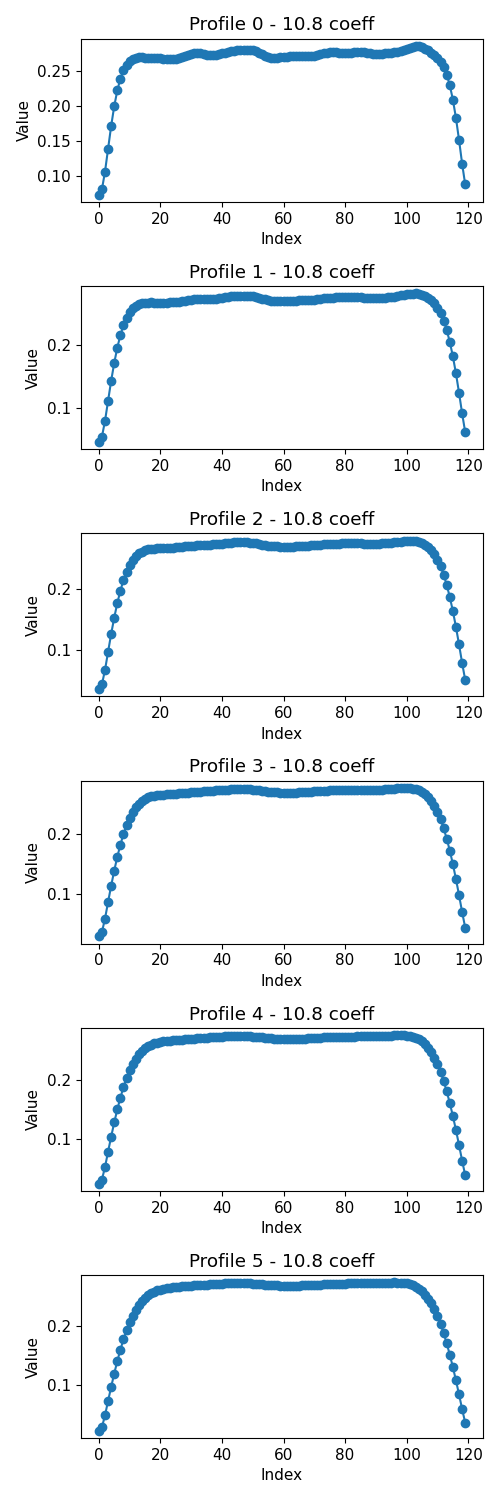

In [24]:
import matplotlib.pyplot as plt

def plot_profiles(temp, sample_range=(4000,4010)):
    fig, axs = plt.subplots(6, figsize=(5, 15))
    subset_indices = range(sample_range[0], sample_range[1])

    for i in range(6):
        ax = axs[i]
        for array in abs(globals()[f"origin_{i}"]["11 1"][subset_indices]):
            ax.plot(array, '-o')
        ax.set_title(f'Profile {i} - 11 1')
        ax.set_xlabel('Index')
        ax.set_ylabel('Value')
    plt.tight_layout()
    plt.show()

#plot_profiles()
import matplotlib.animation as animation

def animate_profiles(temp):
    fig, axs = plt.subplots(6, figsize=(5, 15))

    def update(frame):
        for i in range(6):
            ax = axs[i]
            ax.clear()
            ax.plot(abs(globals()[f"profile_{i}"][temp][frame]), '-o')
            ax.set_title(f'Profile {i} - {temp}')
            ax.set_xlabel('Index')
            ax.set_ylabel('Value')
        plt.tight_layout()

    ani = animation.FuncAnimation(fig, update, frames=range(len(globals()["origin_0"][temp][10:20])), repeat=False)
    ani.save('/home/haaaaron/SUN_twist_python_analysis/videos/profile.mp4', writer='ffmpeg', fps=5)

animate_profiles("10.8 coeff")

/tmp/ipykernel_821316/53228208.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(6, figsize=(5, 15))


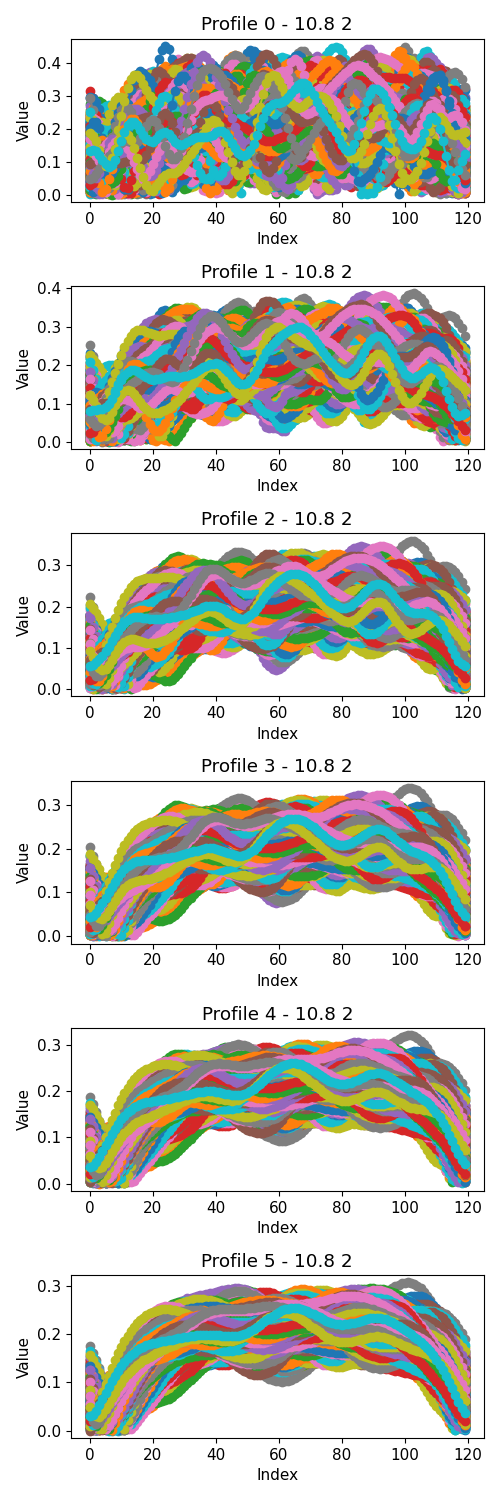

In [32]:
fig, axs = plt.subplots(6, figsize=(5, 15))

subset_indices = range(10000, 11000)

for i in range(6):
    ax = axs[i]
    for array in globals()[f"origin_{i}"]["10.8 coeff"][subset_indices]:
        ax.plot(array, '-o')
    ax.set_title(f'Profile {i} - 10.8 2')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
plt.tight_layout()
plt.show()

In [14]:
data = globals()["polyakov"]["10.8 2"][:, :-1]
final_column = globals()["polyakov"]["10.8 2"][:, -1]

KeyError: 'polyakov'

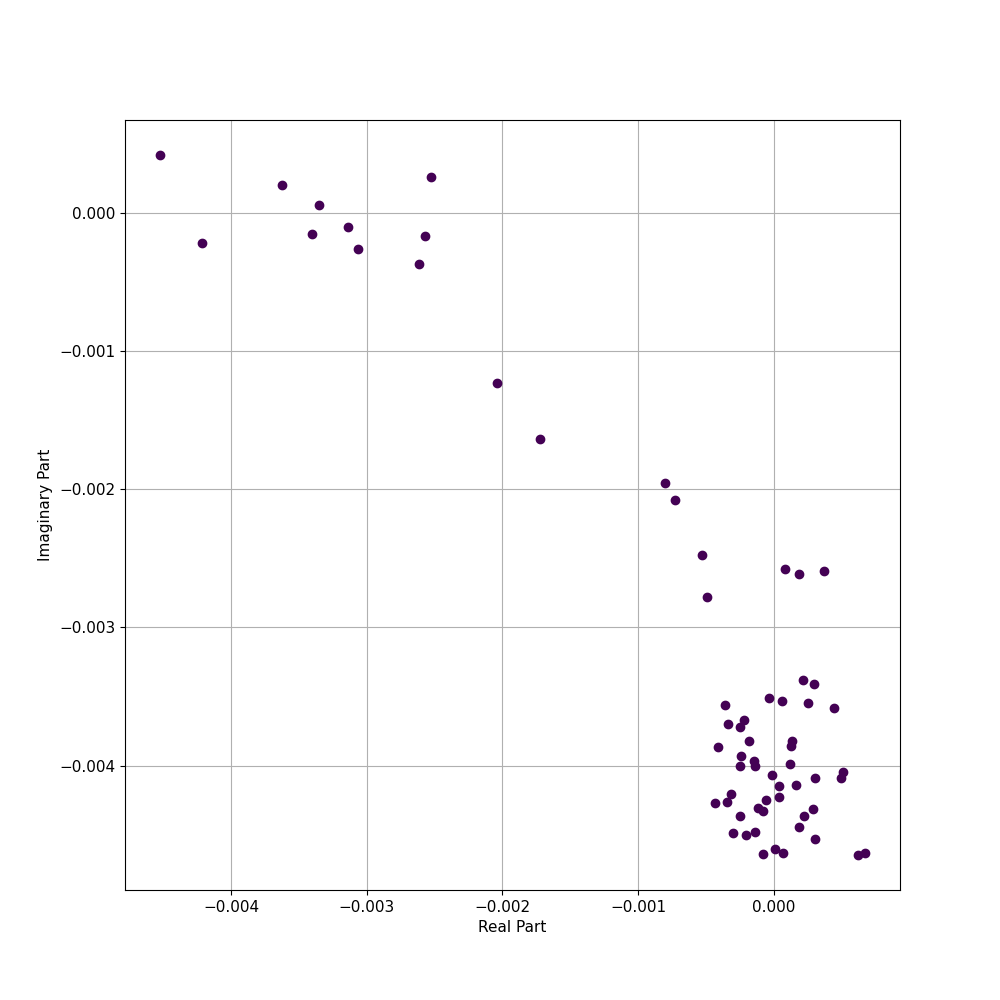

In [119]:
import numpy as np

fig2, axs2 = plt.subplots(1, figsize=(10, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(data[700:750])))

for idx, arr in enumerate(data[800:801]):
    axs2.plot(arr.real, arr.imag, 'o', color=colors[idx])

axs2.set_xlabel('Real Part')
axs2.set_ylabel('Imaginary Part')
axs2.grid(True)
plt.show()

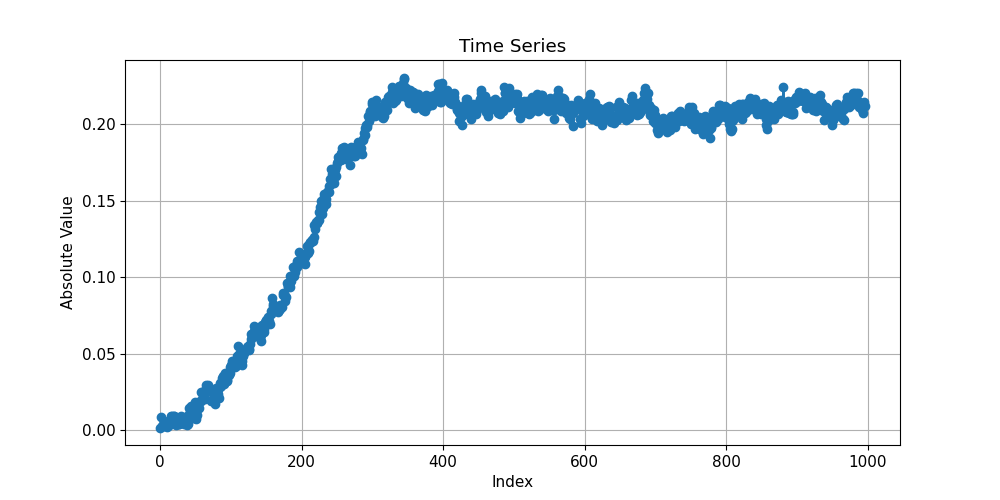

In [123]:
final_column
plt.figure(figsize=(10, 5))
plt.plot(np.abs(final_column), '-o')
plt.title('Time Series')
plt.xlabel('Index')
plt.ylabel('Absolute Value')
plt.grid(True)
plt.show()